

# Investor Risk Tolerance and Robo advisors

The goal of this case study is to build a machine learning model to predict the risk tolerance or risk aversion of an investor, and use the model in a robo-advisor dashboard.


## Content

* [1. Problem Definition](#0)
* [2. Getting Started - Load Libraries and Dataset](#1)
    * [2.1. Load Libraries](#1.1)    
    * [2.2. Load Dataset](#1.2)
* [3. Data Preparation and Feature Selection](#2)
    * [3.1. Preparing the predicted variable](#2.1)    
    * [3.2. Feature Selection-Limit the Feature Space](#2.2)
* [4.Evaluate Algorithms and Models](#4)        
    * [4.1. Train/Test Split](#4.1)
    * [4.2. Test Options and Evaluation Metrics](#4.2)
    * [4.3. Compare Models and Algorithms](#4.3)
* [5. Model Tuning and Grid Search](#5)  
* [6. Finalize the Model](#6)  
    * [6.1. Results on test dataset](#6.1)
    * [6.2. Feature Importance](#6.1)
    * [6.2. Feature Intuition](#6.3)


<a id='0'></a>
# 1. Problem Definition

"This initiative focuses on developing an advanced machine learning system geared towards portfolio management optimization. The primary goal is to design an algorithm that can effectively diagnose investor risk profiles, construct efficient investment frontiers, and provide data-driven recommendations for maximizing portfolio returns. This sophisticated system caters to a spectrum of users, including both newcomers and seasoned investors, delivering insights that have the potential to reshape portfolio management strategies through data analytics and predictive modeling techniques.

## Phase 2 ##
This notebook marks the second phase of our project, where we delve into training a specialized machine learning model to forecast risk tolerance. Leveraging an array of pertinent features, the algorithm is designed to predict an investor's risk appetite based on their individual characteristics. This predictive prowess can substantially enhance our ability to tailor investment strategies, thus deepening the data-driven aspects of portfolio management."

##Disclamer##
"This project is built upon the foundation laid by Hariom Tatsat in his book 'Machine Learning and Data Science Blueprints for Finance.' Specifically, it draws inspiration from Chapter 5's exploration of Supervised Learning, Regression, and Time Series models. The project closely follows Case Study 3, which delves into the critical area of Investor Risk Tolerance and Robo-advisors. The objective is to extend and build upon Tatsat's insights, methodologies, and findings to create an innovative machine learning application that optimizes investment portfolio management."

For this case study the data used is from survey of Consumer Finances which is conducted by the Federal Reserve
Board. The data source is : 
https://www.federalreserve.gov/econres/scfindex.htm

<a id='1'></a>
# 2. Getting Started- Loading the data and python packages

<a id='1.1'></a>
## 2.1. Loading the python packages

In [111]:

from RTfuncs import *
import numpy as np
import pandas as pd
#import pandas_datareader.data as web
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns
import copy 
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neural_network import MLPRegressor

#Libraries for Deep Learning Models
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.layers import LSTM
#from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import KFold, cross_val_score


#Libraries for Statistical Models
import statsmodels.api as sm

#Libraries for Saving the Model
from pickle import dump
from pickle import load

<a id='1.2'></a>
## 2.2. Loading the Data

In [121]:
path = '../raw_data/clean_dataset.csv'
dataset = pd.read_csv(path)

In [122]:
#Diable the warnings
import warnings
warnings.filterwarnings('ignore')

<a id='2'></a>
## 3. Data Preparation and Feature Selection

<a id='2.1'></a>
## 3.1. Preparing the predicted variable

In [123]:
dataset.head()

,YY1,AGE,KIDS,INCOME,YESFINRISK,NETWORTH,LIQ,CDS,SAVBND,CASHLI,...,FAMSTRUCT_3,FAMSTRUCT_4,FAMSTRUCT_5,OCCAT1_1,OCCAT1_2,OCCAT1_3,OCCAT1_4,WSAVED_1,WSAVED_2,WSAVED_3
0,1,1.312954,0.0,-0.104972,0,0.929046,6000,25000,0,44000,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,1.312954,0.0,-0.160221,0,0.910489,6000,29000,0,44000,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,1.312954,0.0,-0.187845,0,0.924779,6000,29000,0,44000,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,1.312954,0.0,-0.243094,0,1.126972,6000,28000,0,44000,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,1.312954,0.0,-0.193370,0,0.940260,6000,27000,0,44000,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [124]:
#Risk Tolerance 2019
RT= calculate_risk_tolerance(dataset)

In [125]:
deep_copy(dataset)

In [126]:
print('Null Values =',dataset.isnull().values.any())

Null Values = True


In [134]:
dataset=dataset.dropna(axis=0)
dataset = dataset[~dataset.isin([np.nan, np.inf, -np.inf]).any(axis=1)]
#Checking for any null values and removing the null values'''
print('Null Values =',dataset2.isnull().values.any())

Null Values = False


Let us plot the risk tolerance of 2019. 

<Axes: xlabel='RT'>

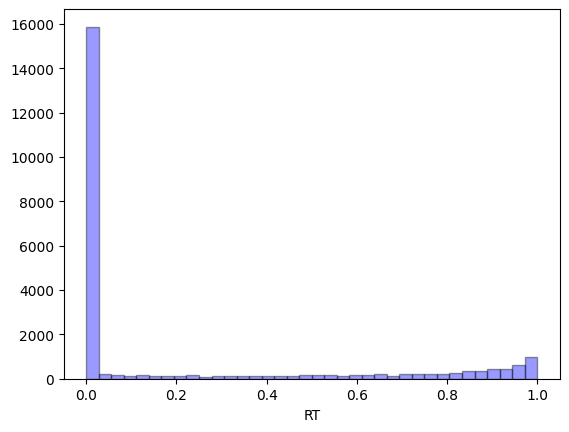

In [135]:
sns.distplot(dataset['RT'], hist=True, kde=False, 
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})

Clearly, the behavior of the individuals reversed in 2019.

Let us drop other labels which might not be needed for the prediction. 

In [19]:
#dataset3.drop(labels=['RT07', 'RT09'], axis=1, inplace=True)
#dataset3.drop(labels=['PercentageChange'], axis=1, inplace=True)

<a id='2.2'></a>
## 3.2. Feature Selection-Limit the Feature Space 

<a id='2.2.2'></a>
### 3.2.2.  Features elimination

In [136]:
keep_list2 = ['HHSEX',
              'AGE',
              'EDCL',
              'MARRIED',
              'KIDS',
              'FAMSTRUCT',
              'OCCAT1',
              'INCOME',
              'WSAVED',
              'YESFINRISK',
              'NETWORTH',
              'RT'
              ]
dataset = preprocess_and_drop_columns(dataset, keep_list2)

Let us look at the correlation among the features.

<Axes: title={'center': 'Correlation Matrix'}>

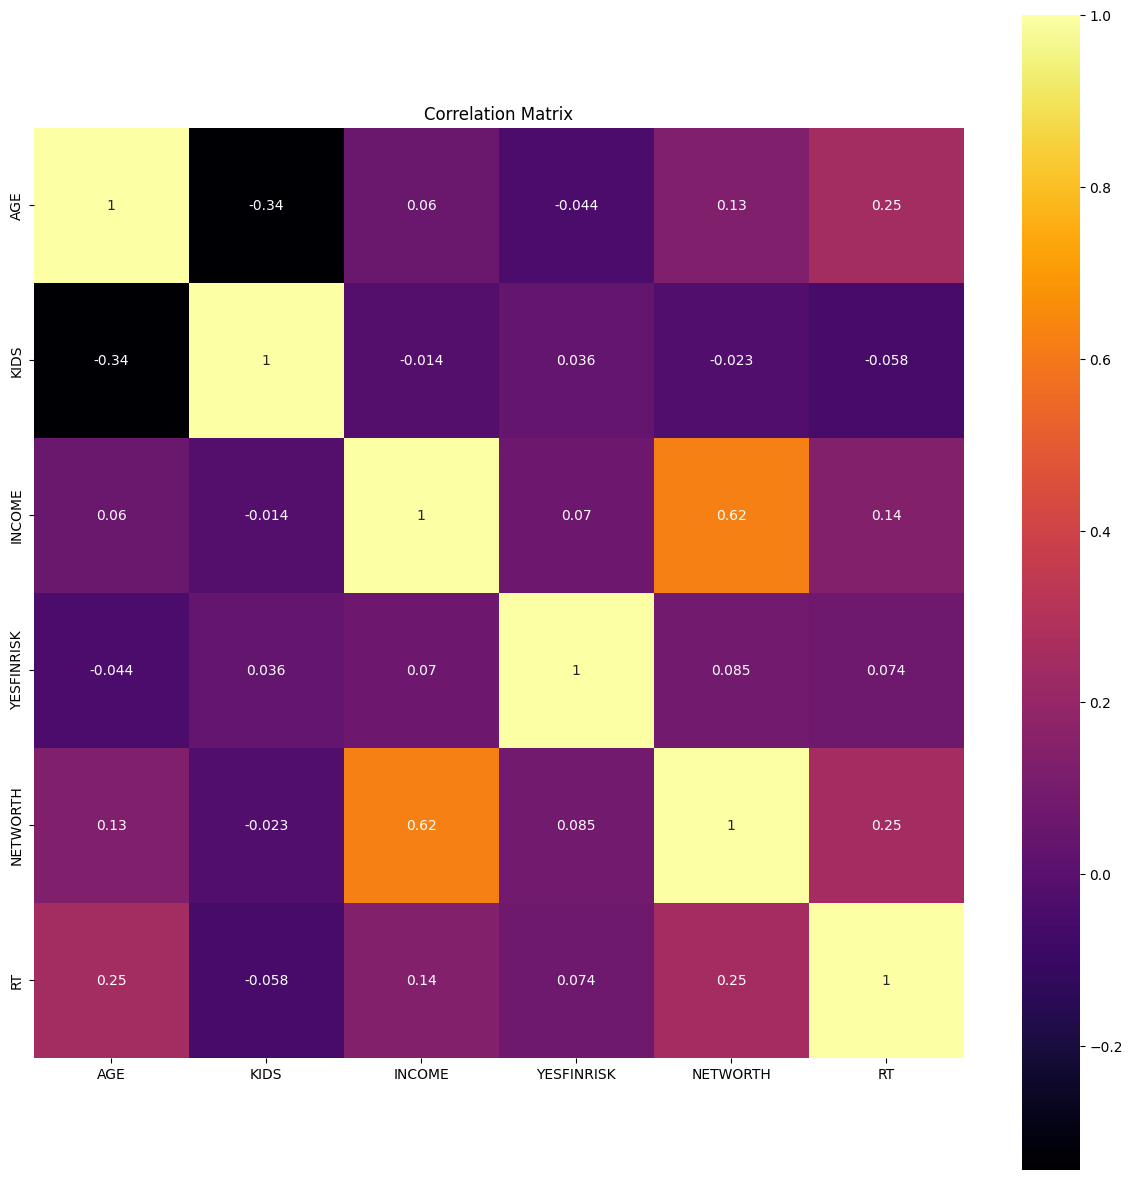

In [137]:
correlation = dataset2.corr()
plt.figure(figsize=(15,15))
plt.title('Correlation Matrix')
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='inferno')

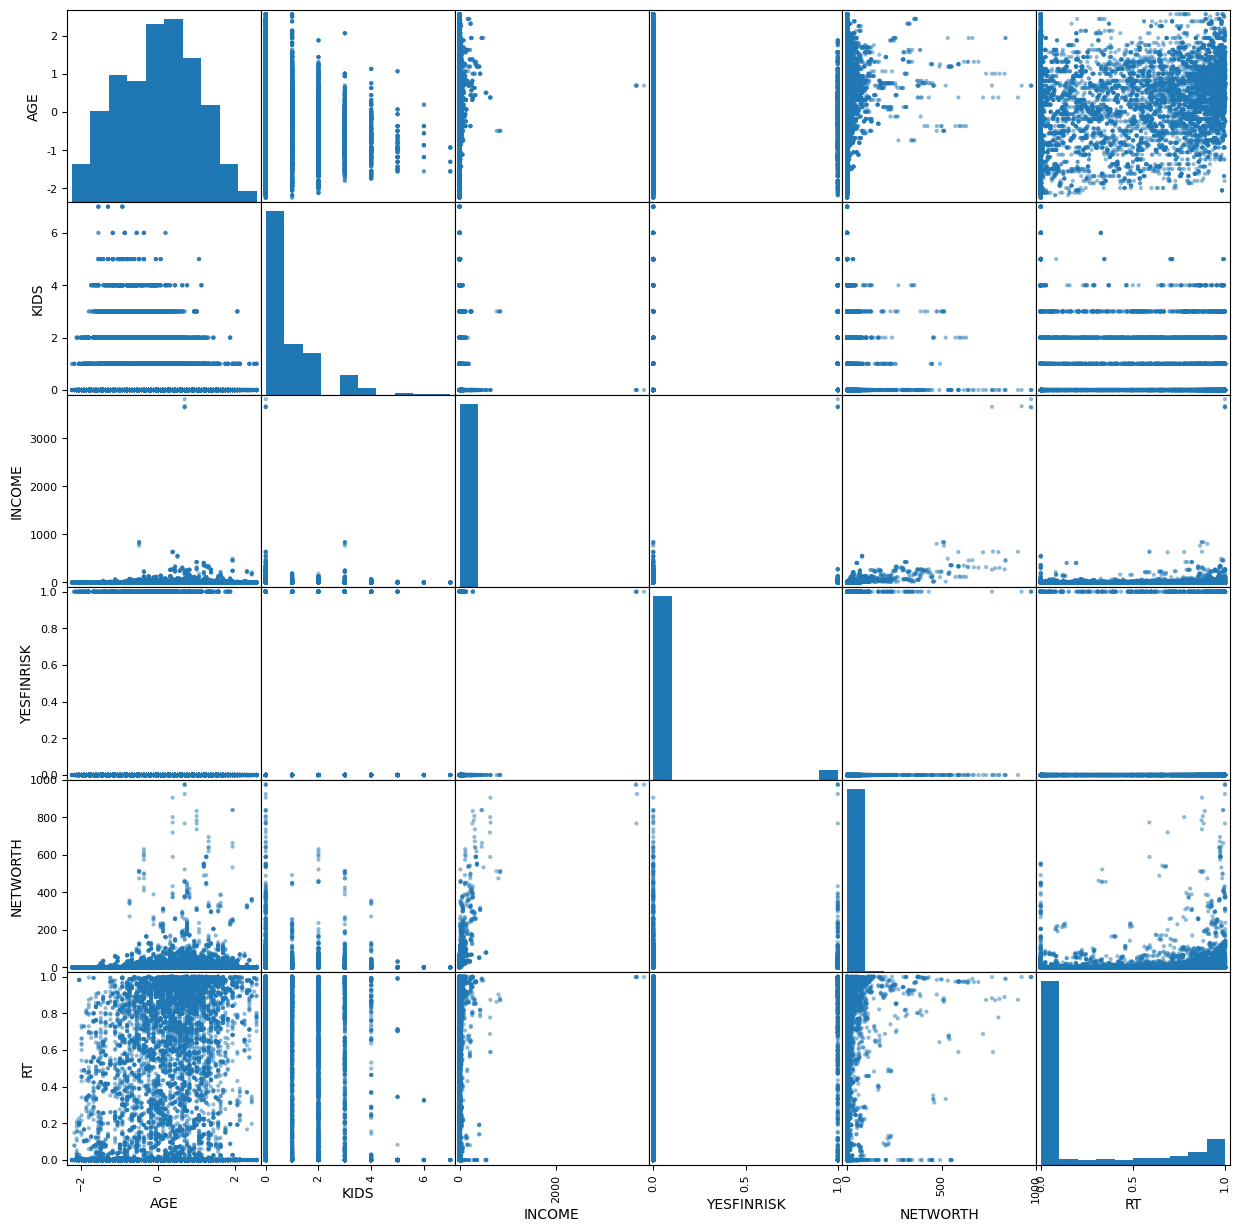

In [138]:
def plot_scatter_matrix(dataset, figsize=(15, 15)):
    scatter_matrix(dataset, figsize=figsize)
    plt.show()
    
plot_scatter_matrix(dataset)

<a id='4'></a>
# 4. Evaluate Algorithms and Models

Let us evaluate the algorithms and the models. 

<a id='4.1'></a>
## 4.1. Train Test Split

Performing a train and test split in this step. 

In [139]:
X_train, X_validation, Y_train, Y_validation = prepare_train_validation_sets(dataset2, 'RT', test_size=0.2, random_state=3)

<a id='4.2'></a>
## 4.2. Test Options and Evaluation Metrics


In [140]:
# test options for regression
num_folds = 10
scoring = 'neg_mean_squared_error'
scoring ='neg_mean_absolute_error'
scoring = 'r2'

<a id='4.3'></a>
## 4.3. Compare Models and Algorithms

### Regression Models

In [141]:
regression_models = create_regression_models()

### K-folds cross validation

In [145]:
model_names, model_results, best_model = perform_cross_validation_and_store_results_with_best_model(regression_models, X_train, Y_train, num_folds=10, seed=3)

LR: 0.109457 (0.003040)
LASSO: 0.116129 (0.002583)
EN: 0.115735 (0.002755)
KNN: 0.045415 (0.003411)
CART: 0.038607 (0.002885)
SVR: 0.081804 (0.003836)
ABR: 0.079150 (0.003002)
GBR: 0.067349 (0.002587)
RFR: 0.021860 (0.001741)
ETR: 0.013024 (0.001463)


### Algorithm comparison

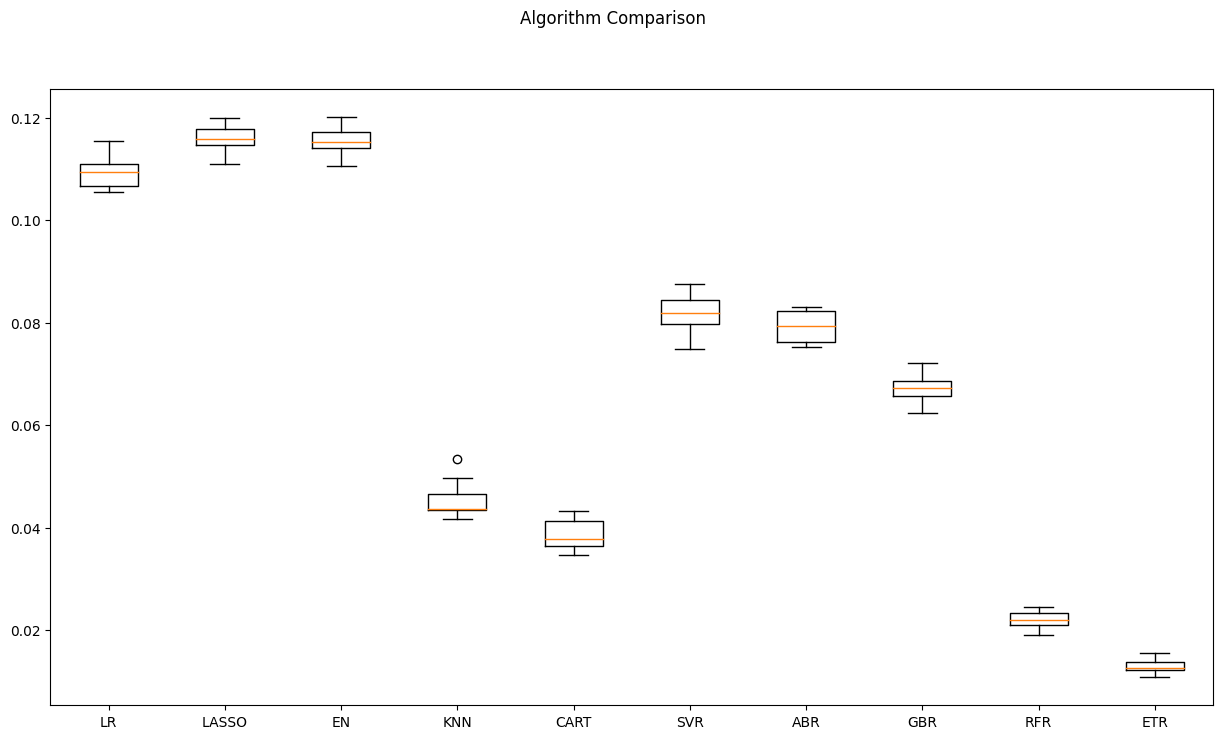

In [150]:
# compare algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(model_results)
ax.set_xticklabels(model_names)
fig.set_size_inches(15,8)
plt.show()

The non linear models perform better than the linear models, which means that a non linear relationship between the risk tolerance and the difference variables use to predict it. Given random forest regression is one of the best methods, we use it for further grid search. 

<a id='5'></a>
# 5. Model Tuning and Grid Search

Given that the Random Forest is the best model, Grid Search is performed on Random Forest.

In [151]:
perform_grid_search_random_forest(X_train, Y_train, best_model, num_folds=10, seed=3)

Best: 0.824749 using {'n_estimators': 400}
0.820543 (0.011425) with: {'n_estimators': 50}
0.822558 (0.012153) with: {'n_estimators': 100}
0.823112 (0.012343) with: {'n_estimators': 150}
0.823951 (0.012107) with: {'n_estimators': 200}
0.824428 (0.012150) with: {'n_estimators': 250}
0.824488 (0.012204) with: {'n_estimators': 300}
0.824728 (0.012384) with: {'n_estimators': 350}
0.824749 (0.012400) with: {'n_estimators': 400}


Random forest with number of estimators 350, is the best model after grid search. 

<a id='6'></a>
# 6. Finalise the Model

Finalize Model with best parameters found during tuning step.

<a id='6.1'></a>
## 6.1. Results on the Test Dataset

In [152]:
model= create_and_fit_model(X_train, Y_train, RandomForestRegressor, n_estimators=400)

In [160]:
predictions_train = model.predict(X_train)
r2_train = calculate_r2_score(predictions_train, Y_train)
print("R^2 Score (Train):", r2_train)

R^2 Score (Train): 0.9779718146094201


In [161]:
mse, r2 = evaluate_regression_model(model, X_validation, Y_validation)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 0.023003735612986933
R^2 Score: 0.8219507816363409


From the mean square error and R2 shown above for the test set, the results look good. 

<a id='6.2'></a>
## 6.2. Feature Importance and Features Intuition

Looking at the details above Random forest be worthy of further study.
Let us look into the Feature Importance of the RF model

[0.15346019 0.03545394 0.1948505  0.01002075 0.60621463]


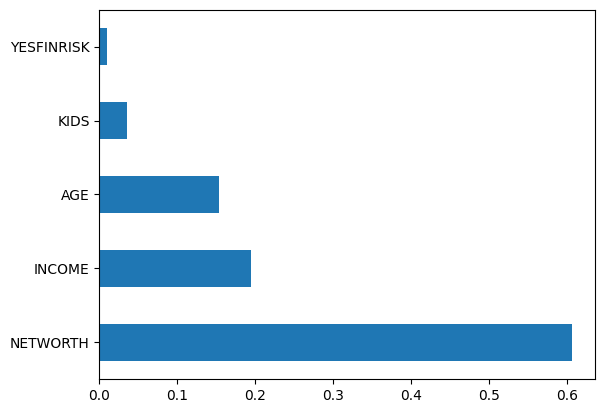

In [157]:
import pandas as pd
import numpy as np
model = RandomForestRegressor(n_estimators= 200,n_jobs=-1)
model.fit(X_train,Y_train)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

From the chart above, income and networth followed by age and willingness to take risk are the key variables to decide the risk tolerance. These variables have been considered as the key variables to model the risk tolerance across several literature. 

<a id='6.3'></a>
## 6.3. Save Model for Later Use

In [162]:
model_filename = 'finalized_model.sav'
save_model_to_pickle(model, model_filename)

Model saved as finalized_model.sav


In [163]:
model_filename = 'finalized_model.sav'
load_and_evaluate_model(model_filename, X_validation, Y_validation)


R^2 Score: 0.8219507816363409
Mean Squared Error: 0.023003735612986933


__Conclusion__:

We showed that machine learning models might be able to objectively
analyze the behavior of different investors in a changing market and attribute these
changes to variables involved in determining risk appetite. With an increase in the
volume of investor’s data and availability of rich machine learning infrastructure,
such models might prove to be more useful.

We saw that there is a non-linear relationship between the variables and the risk tolerance. Income and net worth followed by age and willingness to take risk are the key variables to decide the risk tolerance. These variables have been considered as the key variables to model the risk tolerance across several literature.
